# Classification (1)

import DS

# ThoracicSurgery


Thoracic surgery is the repair of organs located in the thorax, or chest. The thoracic cavity lies between the neck and the diaphragm, and contains the heart and lungs (cardiopulmonary system), the esophagus, trachea, pleura, mediastinum, chest wall, and diaphragm


### Dataset

The data is dedicated to classification problem related to the post-operative life expectancy in the lung cancer patients: class 1 - death within one year after surgery, class 2 - survival.

Data and risk factors Reference: https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data

The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007–2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.



Attribute Information:

1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1) 
2. PRE4: Forced vital capacity - FVC (numeric) 
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric) 
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0) 
5. PRE7: Pain before surgery (T,F) 
6. PRE8: Haemoptysis before surgery (T,F) 
7. PRE9: Dyspnoea before surgery (T,F) 
8. PRE10: Cough before surgery (T,F) 
9. PRE11: Weakness before surgery (T,F) 
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13) 
11. PRE17: Type 2 DM - diabetes mellitus (T,F) 
12. PRE19: MI up to 6 months (T,F) 
13. PRE25: PAD - peripheral arterial diseases (T,F) 
14. PRE30: Smoking (T,F) 
15. PRE32: Asthma (T,F) 
16. AGE: Age at surgery (numeric) 
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F) 

Class Distribution: the class value (Risk1Y) is binary valued. 
Risk1Y Value: Number of Instances: 
T 70 
N 400 



## Decision Tree (DT)

Let us go through this example: http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html

We need Information theory metrics such as Entropy to prune the tree or to determine the split point: 

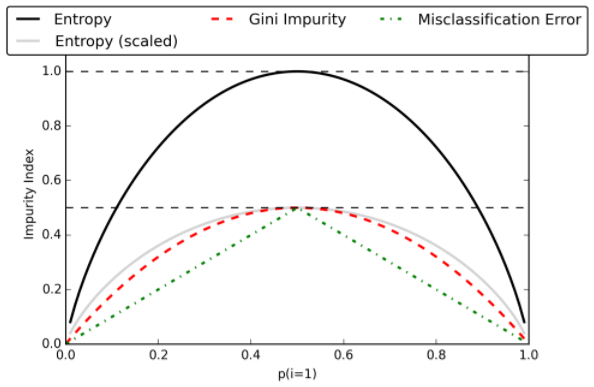



A Presentation for DT metrics: http://www.ke.tu-darmstadt.de/lehre/archiv/ws0809/mldm/dt.pdf



** Run DT with one train and test and save the results as a figure to show **

In [2]:
import sklearn.tree
help (sklearn.tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_features : int, float, string or None, optional (default=None)
 |      The number of features to consider when looking for the best split:
 |  
 |          - If int, then consider `max_features` features at each split.
 |          - If float, then `max_features` is a percentage and
 |

In [ ]:
def runDTOneTrTe(dataSets=[]):
    
    Results={}
    for ds in dataSets:
        _,myTrain,myVal=dataEncoding(ds,taskID='filesBinClass')
        #myTrain = skb(f_regression, k=3).fit_transform(myTrain,myVal)
        X_train, X_val, y_train, y_val = tts(myTrain,myVal, test_size=0.2, random_state=42)
        
        Classifiers[1].fit(X_train,y_train)
        with open('DTclassifier_'+filesBinClass[ds]+'.txt', "w") as f:
            f = export_graphviz(Classifiers[1], 
                                class_names=y_val.name,
                                feature_names= myTrain.columns,
                                rounded=True,
                                filled=True,
                                out_file=f)
        
        Results[ds]= Classifiers[1].score(X_val,y_val)
   
    return Results

In [2]:
DS.runDTOneTrTe(dataSets=[2])

{2: 0.77659574468085102}

To draw the below figure: 
1. Retrieve the output text file: [a relative link](DTclassifier_ThoracicSurgery.txt)
2. Cut and paste the content and Go to the http://www.webgraphviz.com/ to visualize

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="AGE <= 79.5\ngini = 0.2345\nsamples = 376\nvalue = [325, 51]\nclass = R", fillcolor="#e58139d7"] ;
1 [label="PRE5 <= 0.98\ngini = 0.2223\nsamples = 369\nvalue = [322, 47]\nclass = R", fillcolor="#e58139da"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = i", fillcolor="#399de5ff"] ;
1 -> 2 ;
3 [label="DGN <= 5.5\ngini = 0.2188\nsamples = 368\nvalue = [322, 46]\nclass = R", fillcolor="#e58139db"] ;
1 -> 3 ;
4 [label="gini = 0.2152\nsamples = 367\nvalue = [322, 45]\nclass = R", fillcolor="#e58139db"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = i", fillcolor="#399de5ff"] ;
3 -> 5 ;
6 [label="PRE4 <= 3.055\ngini = 0.4898\nsamples = 7\nvalue = [3, 4]\nclass = i", fillcolor="#399de540"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
7 [label="PRE25 <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = R", fillcolor="#e58139aa"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = R", fillcolor="#e58139ff"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = i", fillcolor="#399de5ff"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = i", fillcolor="#399de5ff"] ;
6 -> 10 ;
}

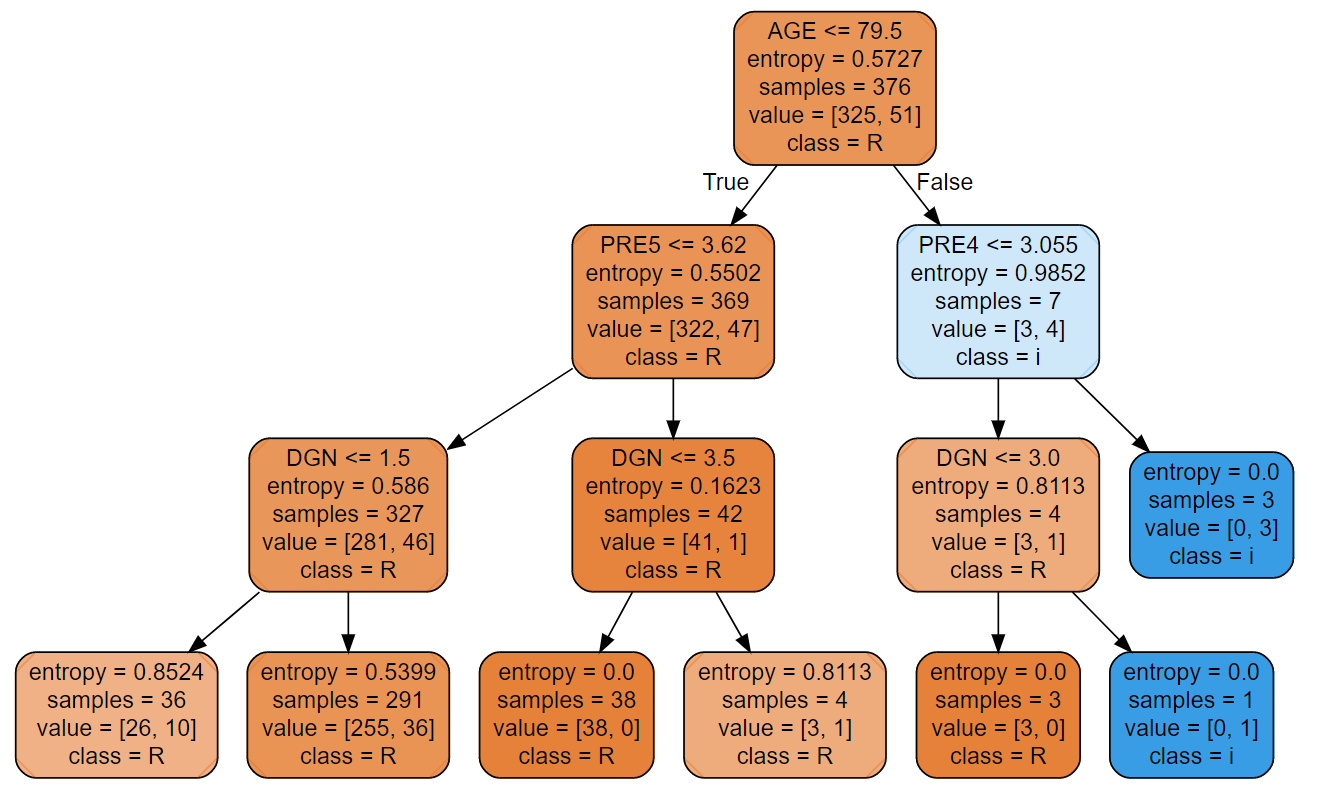

## K-Nearest Neighbor (K-NN)  -- Lazy learning


### Steps:

    1. Choose the number of k and the distance metric.
    2. Find the k nearest numbers of the sample that we want to classify.
    3. Assign the class label by majority votes. 

<img src="../images/KNN.png" height= 40% width=40% style="right;">

A presentations for KNN:

- http://www.csd.uwo.ca/courses/CS9840a/Lecture2_knn.pdf





In [5]:
import sklearn.neighbors
help (sklearn.neighbors)

Help on package sklearn.neighbors in sklearn:

NAME
    sklearn.neighbors

DESCRIPTION
    The :mod:`sklearn.neighbors` module implements the k-nearest neighbors
    algorithm.

PACKAGE CONTENTS
    approximate
    ball_tree
    base
    classification
    dist_metrics
    graph
    kd_tree
    kde
    nearest_centroid
    regression
    setup
    tests (package)
    typedefs
    unsupervised

CLASSES
    builtins.object
        sklearn.neighbors.dist_metrics.DistanceMetric
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.neighbors.approximate.LSHForest(sklearn.base.BaseEstimator, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.RadiusNeighborsMixin)
        sklearn.neighbors.kde.KernelDensity
        sklearn.neighbors.nearest_centroid.NearestCentroid(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
    sklearn.base.ClassifierMixin(builtins.object)
        sklearn.neighbors.classification.KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, s

## Support Vector Machine (SVM)  

It is an optimaztion problem to maximize the margin; which is the distance between the seperating hyperplane (decision boundry) and the training examples (support vectors) that are closest to this hyperplane. However, if we increase the margin two much, we have overfitting; if we decrease the margin two much, we have underfitting.


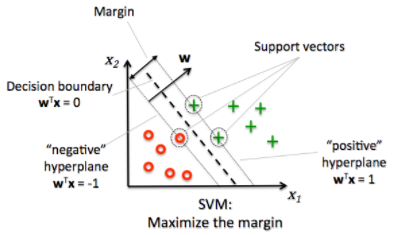



A presentations of SVM:
- http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf



In [6]:
import sklearn.svm
help (sklearn.svm)

Help on package sklearn.svm in sklearn:

NAME
    sklearn.svm - The :mod:`sklearn.svm` module includes Support Vector Machine algorithms.

PACKAGE CONTENTS
    base
    bounds
    classes
    liblinear
    libsvm
    libsvm_sparse
    setup
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.svm.classes.LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.feature_selection.from_model._LearntSelectorMixin, sklearn.linear_model.base.SparseCoefMixin)
    sklearn.base.RegressorMixin(builtins.object)
        sklearn.svm.classes.LinearSVR(sklearn.linear_model.base.LinearModel, sklearn.base.RegressorMixin)
        sklearn.svm.classes.NuSVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
        sklearn.svm.classes.SVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
    sklearn.feature_selection.from_model._LearntSelectorMixin(sklearn.base.TransformerMixin)
        sklearn.svm.classes.LinearS

** Compare AUCs and draw ROCs for the above three classifiers. Also return the confussion matrix for each classifier**

DS.compareAUCwithROC: [a relative link](DS.py)
DS.runClassifierConfussionMatrix

In [ ]:
def compareAUCwithROC(dataSets=[],Classifiers=[],names=[]):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    clf_labels=[]
    le=pre.LabelEncoder()
    
    for n in names:
        clf_labels.append(ClassifiersNames[n])
    
    colors = ['black', 'orange', 'blue', 'green']
    linestyles = [':', '--', '-.', '-']    
    
    

    for ds in dataSets:
        _,myTrain,myVal=dataEncoding(ds,taskID='filesBinClass')
        le.fit(myVal)
        myVal=le.transform(myVal)
        
        #myTrain = skb(f_regression, k=3).fit_transform(myTrain,myVal)
        X_train, X_val, y_train, y_val = tts(myTrain,myVal, test_size=0.20, random_state=42)

        
        for clf, label, clr, ls  in zip(Classifiers, clf_labels, colors, linestyles):
            y_pred = clf.fit(X_train,y_train).predict_proba(X_val)[:, 1] # Assume 1 is the positive class
            fpr, tpr, thresholds = roc_curve(y_true=y_val, y_score=y_pred)
            roc_auc = auc(x=fpr, y=tpr)
            plt.plot(fpr, tpr,color=clr,linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
        plt.xlim([-0.1, 1.1])
        plt.ylim([-0.1, 1.1])
        plt.grid()
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()    



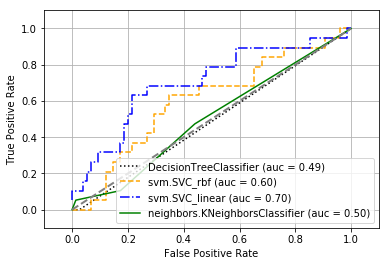

In [3]:
DS.compareAUCwithROC([2],[DS.Classifiers[1],DS.Classifiers[2],DS.Classifiers[3], DS.Classifiers[4]],[1,2,3,4])

In [ ]:
def runClassifierConfussionMatrix(dataSets=[],Classifiers=[],names=[]):
    
    Results={}
    for ds in dataSets:
        _,myTrain,myVal=dataEncoding(ds,taskID='filesBinClass')
        #myTrain = skb(f_regression, k=3).fit_transform(myTrain,myVal)
        X_train, X_val, y_train, y_val = tts(myTrain,myVal, test_size=0.20, random_state=42)
        count =-1
        cls={}
        for clf in Classifiers:
            count = count +1
            Classifiers[count].fit(X_train,y_train)
            pred =Classifiers[count].predict(X_val)
            tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
            cls[ClassifiersNames[names[count]]]= [tn, fp, fn, tp]
             
        Results[filesBinClass[ds]]= cls
   
    return Results

In [4]:
DS.runClassifierConfussionMatrix([2],[DS.Classifiers[1],DS.Classifiers[2],DS.Classifiers[3], DS.Classifiers[4]],[1,2,3,4])

{'ThoracicSurgery': {'DecisionTreeClassifier': [73, 2, 19, 0],
  'neighbors.KNeighborsClassifier': [75, 0, 19, 0],
  'svm.SVC_linear': [75, 0, 19, 0],
  'svm.SVC_rbf': [75, 0, 19, 0]}}

** Bad Results** 

Let us try another dataset https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes


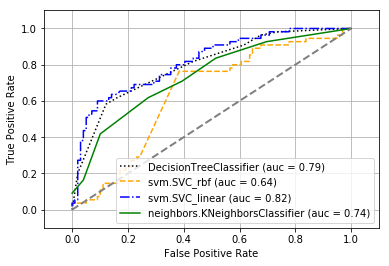

{'PimaAmericanIndianDiabetes': {'DecisionTreeClassifier': [83, 16, 21, 34],
  'neighbors.KNeighborsClassifier': [72, 27, 21, 34],
  'svm.SVC_linear': [80, 19, 19, 36],
  'svm.SVC_rbf': [99, 0, 55, 0]}}

In [5]:
DS.compareAUCwithROC([0],[DS.Classifiers[1],DS.Classifiers[2],DS.Classifiers[3], DS.Classifiers[4]],[1,2,3,4])
DS.runClassifierConfussionMatrix([0],[DS.Classifiers[1],DS.Classifiers[2],DS.Classifiers[3], DS.Classifiers[4]],[1,2,3,4])

# Soft Prediction by Classifiers and Regression


## Soft Classification

The idea is instead of resulting crisp integer or binary outcome, the classifier tends to output a membership probability for each class. As well, it may use a numeric similarity functions to define ranges as soft borderline(s) or margins between outcome classes

## Regression

As above, the classifier outputs a probability as a prediction to the nearest value for the numeric outcome.

## Classifiers for Regression

In sklearn, there are many classifiers. Examples for the above classifiers are ['DecisionTreeRegressor', 'svm.SVR','KNeighborsRegressor']

*** Use : DS.runBestRegsCompKFold() to output their MSEs for the above classifiers and then compare with linear regression
[a relative link](DS.py) ***

In [ ]:
def runBestRegsCompKFold(dataSets=[],regModels=[],names=[]):
    
    myResults={}
    for ds in dataSets:
        myData,myTrain,myVal=dataEncoding(ds,taskID='filesReg')
        #myTrain = skb(f_regression, k=3).fit_transform(myTrain,myVal)
        for name in myTrain.columns:
          if (not(myTrain[name].dtype=='O')):
            myTrain[name]=pre.minmax_scale(myTrain[name].astype('float')) 
        splits =kf(n_splits=10, shuffle=True, random_state=42)
        infinity = float("inf")
        index=-1 
        count =-1
        for reg in regModels:
            count = count +1
            reg.fit(myTrain, myVal)
            cvsScores=cvs(reg, myTrain, myVal,cv=splits,scoring='neg_mean_squared_error')
            meanSquareRootError=np.sqrt(-1*cvsScores.mean())
            print(RegsCompNames[names[count]],meanSquareRootError)
            if (meanSquareRootError < infinity):
                infinity = meanSquareRootError
                index = count
                L1,L2,L3= RegsCompNames[names[index]],cvsScores, infinity
        print(filesReg[ds],RegsCompNames[names[index]],infinity)
        myResults[filesReg[ds]]={1:L1,2:L2,3:L3}
        print('\n')     
    return myResults 

In [6]:
DS.runBestRegsCompKFold([0,1],[DS.RegsComp[1],DS.RegsComp[2],DS.RegsComp[3]],[1,2,3]) 

DecisionTreeRegressor 62.3535138267
svm.SVR 75.7442081699
KNeighborsRegressor 59.0206031271
diabetes KNeighborsRegressor 59.0206031271


DecisionTreeRegressor 3.48945824976
svm.SVR 3.4957839566
KNeighborsRegressor 1.35792456209
parkinsons KNeighborsRegressor 1.35792456209




{'diabetes': {1: 'KNeighborsRegressor',
  2: array([-2861.6185941 , -2866.56190476, -3109.11641929, -4458.69016698,
         -3804.50324675, -3676.21150278, -3294.75834879, -4015.00139147,
         -3222.16465677, -3525.68970315]),
  3: 59.020603127093501},
 'parkinsons': {1: 'KNeighborsRegressor',
  2: array([-0.97875775, -2.35805408, -1.70997325, -1.98992358, -1.63032494,
         -2.10007004, -2.11669137, -1.7845768 , -1.74573513, -2.02548422]),
  3: 1.3579245620915039}}

In [7]:
DS.runBestRegsCompKFold([0,1],[DS.RegsComp[0],DS.RegsComp[1],DS.RegsComp[2],DS.RegsComp[3]],[0,1,2,3]) 

LinearRegression 54.9877879922
DecisionTreeRegressor 62.3535138267
svm.SVR 75.7442081699
KNeighborsRegressor 59.0206031271
diabetes LinearRegression 54.9877879922


LinearRegression 3.26493752482
DecisionTreeRegressor 3.48945824976
svm.SVR 3.4957839566
KNeighborsRegressor 1.35792456209
parkinsons KNeighborsRegressor 1.35792456209




{'diabetes': {1: 'LinearRegression',
  2: array([-2743.91123776, -2979.19128064, -2427.07375419, -2943.53472742,
         -3649.95462856, -2941.17849061, -2408.5223554 , -3170.73664908,
         -3485.68036143, -3486.78479771]),
  3: 54.987787992237685},
 'parkinsons': {1: 'KNeighborsRegressor',
  2: array([-0.97875775, -2.35805408, -1.70997325, -1.98992358, -1.63032494,
         -2.10007004, -2.11669137, -1.7845768 , -1.74573513, -2.02548422]),
  3: 1.3579245620915039}}